In [23]:
import pandas as pd, nltk

df = pd.read_csv('spotify_reviews.csv')
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494
...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973


In [24]:
df['sentiment'] = df['score'].apply(lambda stars: 'negative' if stars <= 2 else 'neutral' if stars == 3 else 'positive')
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN,positive
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494,positive
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616,positive
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494,positive
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494,negative
...,...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105,neutral
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957,positive
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN,neutral
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973,positive


In [25]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download(['punkt', 'stopwords'], quiet=True)

stop_words = set(stopwords.words('english'))
df['processed_content'] = df['content'].apply(lambda text: ' '.join([word for word in word_tokenize(text.lower()) if word.isalnum() and word not in stop_words]))
df


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment,processed_content
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN,positive,good
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494,positive,love app much using spotify 2 years different ...
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616,positive,perfect
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494,positive,best around music streaming app used family pl...
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494,negative,fr gatekeeping play button songs
...,...,...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105,neutral,decent music streaming app around right kinks ...
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957,positive,premium user years spotify fantastic service u...
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN,neutral,lot ads sudden even watch video want uninterru...
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973,positive,ui could better think search bar times liked s...


In [26]:
df_reviews = df[['processed_content', 'score', 'sentiment']]
df_reviews

,processed_content,score,sentiment
0,good,4,positive
1,love app much using spotify 2 years different ...,5,positive
2,perfect,5,positive
3,best around music streaming app used family pl...,5,positive
4,fr gatekeeping play button songs,1,negative
...,...,...,...
84160,decent music streaming app around right kinks ...,3,neutral
84161,premium user years spotify fantastic service u...,4,positive
84162,lot ads sudden even watch video want uninterru...,3,neutral
84163,ui could better think search bar times liked s...,4,positive


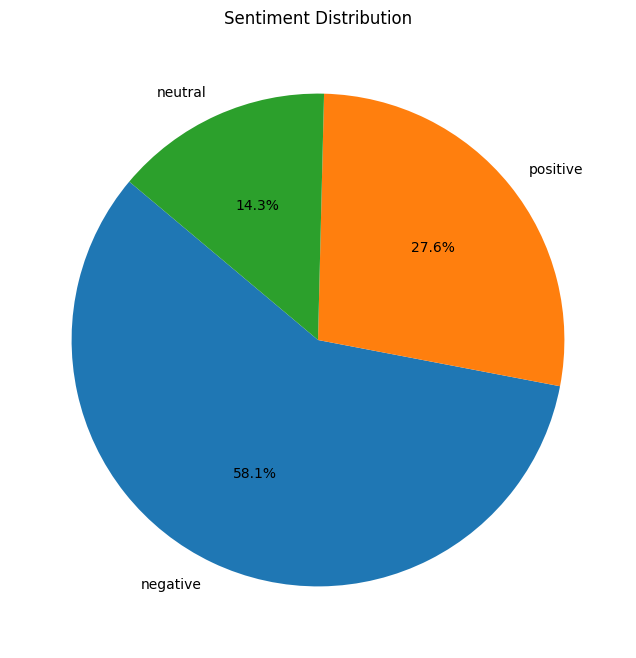

In [27]:
import matplotlib.pyplot as plt  

df_reviews['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, figsize=(8, 8), title='Sentiment Distribution')  
plt.ylabel('')  
plt.show()

In [28]:
df_reviews['sentiment'].value_counts()

sentiment
negative    48906
positive    23240
neutral     12019
Name: count, dtype: int64

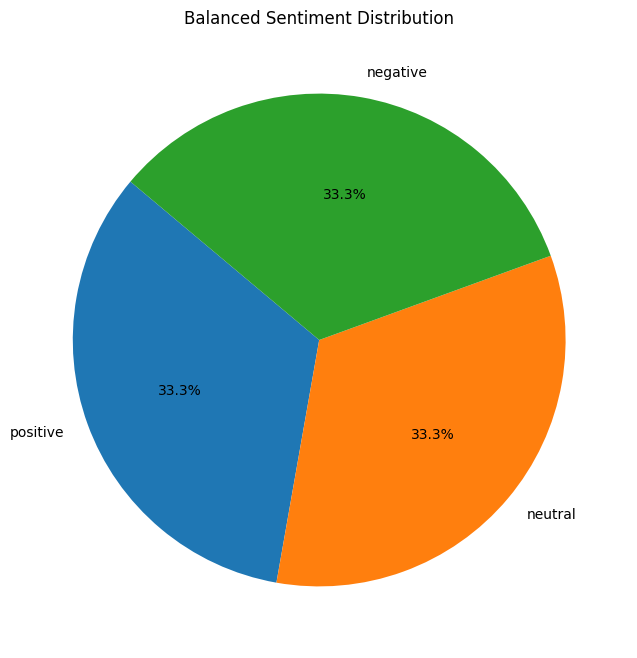

,processed_content,score,sentiment
0,honestly would recommend signing free trial en...,5,positive
1,updated new phone lost music old one since wma...,5,positive
2,great app tons songs support points issue bugs...,4,positive
3,repeat bugged song start beginning,3,neutral
4,best music app using spotify 14yrs love gets r...,5,positive
...,...,...,...
146713,please fix ads problem everytime turn 1 song,3,neutral
146714,pretty good especially premium problem app cus...,3,neutral
146715,hi spotify want tell like app much things also...,3,neutral
146716,gave spotify today tried listening music conce...,3,neutral


In [35]:
from sklearn.utils import resample

# Identify the size of the largest class (negative class size)
max_size = df_reviews['sentiment'].value_counts().max()

# Separate the data by sentiment
negative = df_reviews[df_reviews['sentiment'] == 'negative']
positive = df_reviews[df_reviews['sentiment'] == 'positive']
neutral = df_reviews[df_reviews['sentiment'] == 'neutral']

# Oversample the minority classes (positive and neutral) to match the max size
positive_resampled = resample(positive, replace=True, n_samples=max_size, random_state=42)
neutral_resampled = resample(neutral, replace=True, n_samples=max_size, random_state=42)

# Combine the resampled data with the original majority class (negative)
df_balanced = pd.concat([negative, positive_resampled, neutral_resampled])

# Shuffle the data (optional)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Plot the balanced sentiment distribution
df_balanced['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, figsize=(8, 8), title='Balanced Sentiment Distribution')  
plt.ylabel('')  
plt.show()

df_balanced['sentiment'].value_counts()
df_balanced

In [39]:
import logging
from tqdm import tqdm
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import joblib

# Set up the logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Ensure that tqdm works well with pandas
tqdm.pandas()

# Step 1: Preprocess data for training
X = df_balanced['processed_content']  # Features (text content)
y = df_balanced['sentiment']  # Labels (sentiment)

# Step 2: Convert the string labels to numerical values using LabelEncoder
logger.info("Encoding labels to numeric values...")
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Convert text data into numerical features using TfidfVectorizer
logger.info("Converting text data into numerical features...")
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 5: Define the Random Forest model
logger.info("Initializing Random Forest Classifier model...")
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Step 6: Define the hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 7: Set up the RandomizedSearchCV
logger.info("Starting hyperparameter tuning with RandomizedSearchCV...")
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=3, 
    verbose=1, 
    random_state=42, 
    n_jobs=-1
)

# Step 8: Train the model
logger.info("Training the model with hyperparameter tuning...")
random_search.fit(X_train_tfidf, y_train)

# Step 9: Get the best model from the random search
best_model = random_search.best_estimator_
logger.info(f"Best parameters found: {random_search.best_params_}")

# Step 10: Evaluate the best model
logger.info("Making predictions and evaluating the best model...")
y_pred = best_model.predict(X_test_tfidf)

# Step 11: Log the classification report
logger.info("Classification Report:\n" + classification_report(y_test, y_pred))

# Step 12: Save the trained model
logger.info("Saving the best trained model...")
joblib.dump(best_model, 'best_sentiment_model_rf.pkl')


INFO:__main__:Encoding labels to numeric values...
INFO:__main__:Converting text data into numerical features...
INFO:__main__:Initializing Random Forest Classifier model...
INFO:__main__:Starting hyperparameter tuning with RandomizedSearchCV...
INFO:__main__:Training the model with hyperparameter tuning...


Fitting 3 folds for each of 10 candidates, totalling 30 fits


INFO:__main__:Best parameters found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
INFO:__main__:Making predictions and evaluating the best model...
INFO:__main__:Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      9759
           1       0.98      0.97      0.97      9880
           2       0.93      0.95      0.94      9705

    accuracy                           0.95     29344
   macro avg       0.95      0.95      0.95     29344
weighted avg       0.95      0.95      0.95     29344

INFO:__main__:Saving the best trained model...


['best_sentiment_model_rf.pkl']

In [70]:
# Define some test sentences to evaluate our sentiment classifier
test_sentences = [
    "I absolutely love this product!",  # Expected positive
    "its okay but can be improved",  # Expected negative
    "unusable horrible"  # Expected neutral
]

# Get the predictions from our best model
predictions = label_encoder.inverse_transform(best_model.predict(vectorizer.transform(test_sentences)))

# Print out the results
for text, sentiment in zip(test_sentences, predictions):
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")

Text: I absolutely love this product!
Predicted Sentiment: positive

Text: its okay but can be improved
Predicted Sentiment: positive

Text: unusable horrible
Predicted Sentiment: negative



In [63]:
import joblib

# Save the TF-IDF vectorizer to disk
joblib.dump(vectorizer, 'sentiment_tfidf_vectorizer.pkl')
logger.info("TF-IDF vectorizer saved to 'sentiment_tfidf_vectorizer.pkl'")

# Verify we can load it back and get the same transformations
loaded_vectorizer = joblib.load('sentiment_tfidf_vectorizer.pkl')

# Quick test to ensure it produces the same transform
sample_text = ["This is a test sentence"]
original_transform = vectorizer.transform(sample_text)
loaded_transform = loaded_vectorizer.transform(sample_text)

# Check if they're the same
is_same = (original_transform != loaded_transform).nnz == 0
print(f"Vectorizer successfully saved and loaded: {is_same}")

INFO:__main__:TF-IDF vectorizer saved to 'sentiment_tfidf_vectorizer.pkl'


Vectorizer successfully saved and loaded: True
